In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

C:\Users\anees\AppData\Local\Temp\ipykernel_5724\3748546470.py:1: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [3]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'ball.1', 'noball', 'wide', 'byes', 'legbyes',
       'cur_bat_runs', 'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts',
       'cur_bowl_runs', 'inns_runs', 'inns_wkts', 'inns_balls',
       'inns_runs_rem', 'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target',
       'max_balls', 'date', 'year', 'ground', 'country', 'winner', 'toss',
       'competition', 'bat_hand', 'bowl_style', 'bowl_kind', 'batruns',
       'ballfaced', 'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone',
       'pitchLine', 'pitchLength', 'shotType'],
      dtype='object')

In [4]:
df.head()

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
0,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,1,1001349_1_1_1,...,0,1,0,True,208,178,3,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
1,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,2,1001349_1_1_2,...,0,1,0,True,243,175,3,ON_THE_STUMPS,GOOD_LENGTH,DEFENDED
2,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001349_1_1_3,...,1,1,1,True,189,242,4,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
3,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001351_1_1_3,...,0,1,0,True,166,194,5,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,DEFENDED
4,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,4,1001351_1_1_4,...,4,1,4,True,15,222,6,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT


In [4]:
df[(df['ball']>11)][['team_bat','team_bowl','inns','ball','over','date','competition']]

,team_bat,team_bowl,inns,ball,over,date,competition
165211,Titans,Dolphins,1,12,17,2016-11-20,CSA T20 Challenge
328978,Dolphins,Lions,1,13,17,2015-11-04,Ram Slam T20 Challenge
328979,Dolphins,Lions,1,12,18,2015-11-04,Ram Slam T20 Challenge
428555,Panadura Sports Club,Sri Lanka Army,1,12,4,2021-03-07,SLC T20
622199,Kurunegala Youth Cricket Club,Sri Lanka Navy Sports Club,2,12,1,2022-06-12,Clubs T20
...,...,...,...,...,...,...,...
1434990,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,23,8,2023-06-07,Clubs T20
1434991,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,24,8,2023-06-07,Clubs T20
1505956,Malaysia,Hong Kong,1,12,4,2023-09-19,T20I
1507031,Papua New Guinea,Malaysia,2,12,1,2023-09-20,T20I


In [6]:
df[(df['ball']>11)].to_csv('uncleandata.csv')

These very low level T20 leagues, the data quality is often not reliable. Hence, this should explain very high ball values.

In [5]:
df=df[(df['ball']<=11)]

In [8]:
df.shape

(1554887, 55)

In [9]:
df[df['ball']!=df['ball.1']]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType


ball.1 is duplicate of attribute ball.

In [6]:
df=df.drop(columns='ball.1')
df.shape

(1554887, 54)

In [11]:
df['bowl_style'].unique()

array(['RF', 'RFM', 'LB', 'LWS', 'RMF', 'SLA', 'OB', 'LBG', 'LFM', 'LF',
       'RM', 'LMF', 'RM/OB', 'LM', 'LFM/SLA', 'OB/LB', 'LM/SLA/LWS',
       'OB/SLA', 'RAB', 'LS', '-', 'LSM', 'RSM', 'RMF/OB', 'RFM/OB',
       'OB/LBG', 'RFM/LBG', 'RM/LB', 'RM/LBG', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'LAB', 'RMF/LB', 'RFM/LB', 'RM/OB/LB', 'RS'],
      dtype=object)

In [12]:
df.iloc[:1000].to_excel('t20sample_data.xlsx', index=False)

In [7]:
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
result = pd.concat([df[df['bowl_style'] == style][['bowl','bowl_style']].drop_duplicates().head(2) for style in unique_styles])
result

,bowl,bowl_style
2276,Nuwan Kulasekara,RFM
3078,Vikum Sanjaya,RFM
7715,Asela Gunaratne,RMF
28810,Andrew Tye,RMF
20353,Fawad Ahmed,LBG
40125,Adam Zampa,LBG
3598,Seekkuge Prasanna,LB
55231,Cameron Boyce,LB
715323,Mohammed Aslam,LS
1100250,Manson Chikowero,LS


There are few bowling types which have ambiguous values. So after researching the bowlers, we came to know:
1. RFM, RMF means Right Arm Medium Fast
2. LBG, LB means Leg Break, which is usually right arm wrist spin bowlers
3. LS, SLA means Slow Left Arm Offie
4. OB means Right Arm Offie
5. RAB,LAB means Right/Left Arm Bowler, who is likely a part timer who don't have any particular style. Thus we are converting them to RSM(right arm slow medium) and LSM(left arm slow medium). 
Now we are changing these values into more understandable format.

In [8]:
df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
       'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
       'RM/OB/LB']
replacements = {
    'RFM': 'RFM',
    'RMF': 'RFM',
    'LBG': 'RWS',
    'LB': 'RWS',
    'LS': 'SLA',
    'SLA': 'SLA',
    'RAB': 'RS',
    'LAB': 'LS'
}

# Iterate over unique styles and apply replacements
for style in unique_styles:
    replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
    df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'LMF',
       'RM/OB', 'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM',
       '-', 'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [15]:
df.describe()

,p_match,inns,p_bat,p_bowl,ball,score,p_out,over,noball,wide,...,inns_rrr,target,max_balls,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone
count,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,...,734761.000000,734761.000000,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06
mean,1.189248e+06,1.472549e+00,5.063180e+05,5.669501e+05,3.620968e+00,1.278893e+00,5.063946e+05,1.002362e+01,5.714242e-03,3.919577e-02,...,10.341222,160.467487,8.801454e+01,2.019634e+03,1.208241e+00,9.675295e-01,1.253151e+00,8.543081e+01,8.985982e+01,2.142561e+00
std,1.508010e+05,4.992461e-01,3.745934e+05,3.755675e+05,1.818188e+00,1.574937e+00,3.746332e+05,5.640178e+00,9.165568e-02,2.557577e-01,...,14.148465,34.966115,5.238543e+01,2.554422e+00,1.586408e+00,1.772462e-01,1.579413e+00,1.103071e+02,1.100803e+02,2.660337e+00
min,7.223350e+05,1.000000e+00,4.068000e+03,4.068000e+03,1.000000e+00,0.000000e+00,4.068000e+03,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,2.015000e+03,-4.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.125649e+06,1.000000e+00,2.498660e+05,2.976300e+05,2.000000e+00,0.000000e+00,2.498660e+05,5.000000e+00,0.000000e+00,0.000000e+00,...,6.720000,140.000000,0.000000e+00,2.018000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.213058e+06,1.000000e+00,4.228760e+05,4.937730e+05,4.000000e+00,1.000000e+00,4.229650e+05,1.000000e+01,0.000000e+00,0.000000e+00,...,8.620000,161.000000,1.200000e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.304057e+06,2.000000e+00,7.235730e+05,8.376110e+05,5.000000e+00,1.000000e+00,7.243810e+05,1.500000e+01,0.000000e+00,0.000000e+00,...,10.880000,182.000000,1.200000e+02,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.780000e+02,1.890000e+02,4.000000e+00
max,1.412550e+06,2.000000e+00,1.414161e+06,1.413607e+06,1.100000e+01,8.000000e+00,1.414161e+06,2.100000e+01,6.000000e+00,6.000000e+00,...,1002.000000,315.000000,3.000000e+02,2.023000e+03,7.000000e+00,1.000000e+00,8.000000e+00,4.150000e+02,4.660000e+02,8.000000e+00


We can see that the attributes batruns and bowlruns has negative values which is the errors in the data. These data should be removed

In [9]:
df=df[(df['batruns']>=0) & (df['bowlruns']>=0)]
df.shape

(1554671, 54)

Understanding WagonX, WagonY and WagonZone attributes

In [17]:
df.groupby(['wagonZone']).agg({'wagonX':'mean','wagonY':'mean'}).reset_index()

,wagonZone,wagonX,wagonY
0,0,0.000000,0.000000
1,1,228.723680,66.956557
2,2,279.865352,126.732172
3,3,284.986903,212.424818
4,4,221.928538,270.105581
5,5,137.538450,268.838547
6,6,84.483881,207.445834
7,7,86.823447,128.386469
8,8,151.927968,93.099248


In [10]:
df_rankings=pd.read_csv("T20ranking.csv")
df_rankings['Team']

0            India
1          England
2        Australia
3      New Zealand
4         Pakistan
5     South Africa
6      West Indies
7        Sri Lanka
8       Bangladesh
9      Afghanistan
10         Ireland
11         Namibia
12        Zimbabwe
13        Scotland
14     Netherlands
15           Nepal
16             UAE
17            Oman
18             PNG
19          Canada
Name: Team, dtype: object

In [12]:
df_rankings['Team']=df_rankings['Team'].replace('UAE','United Arab Emirates').replace('PNG','Papua New Guinea')

In [20]:
df['competition'].unique()

array(['T20I', 'IPL', 'SL2020', 'BPL 2017', 'SLC Twenty-20 Tournament',
       'BPL 2019', 'AUS v SL', 'SLC T20', 'Bangladesh Premier League',
       'T20 Blast', 'Clubs T20', 'Super T20 Provincial Tournament',
       'AIA Premier T20 Tournament', 'LPL', 'Afghanistan PL', 'CPL',
       'BPL 2016', 'PSL', 'BPL', 'Big Bash League', 'BBL',
       "Men's Hundred", 'Ram Slam T20 Challenge',
       'England tour of South Africa', "Men's 100", 'MSL', 'MSL 2018',
       'Super Smash', 'Cool & Cool Presents Haier Super8 T20 Cup',
       'Cool and Cool Presents Haier Mobile T-20 Cup', 'National T20 Cup',
       'National T20', 'PAK-A v NZ-A T20s',
       'Scotland in United Arab Emirates T20I Match', 'LIONS in UAE',
       'Pakistan A v England Lions unofficial T20I Series',
       'CSA T20 Challenge', 'Ram Slam T20',
       'CSA Provincial T20 Challenge', 'Syed Mushtaq Ali Trophy',
       'SMA TROPHY', 'Shpageeza CL', 'SCL', 'SMA TROPHY FINAL',
       'ENG v IND', 'BBDHU T20', 'Dhaka T20', 'CSA

In [13]:
relevant_competitions=['T20I', 'IPL', 'AUS v SL','T20 Blast','LPL', 'CPL', 'PSL', 'Big Bash League', 'BBL',
       "Men's Hundred",'MSL', 'MSL 2018','Super Smash','National T20 Cup', 'National T20', 'PAK-A v NZ-A T20s',
       'CSA T20 Challenge','CSA Provincial T20 Challenge', 'Syed Mushtaq Ali Trophy','SMA TROPHY','SMA TROPHY FINAL',
        'ENG v IND',  'CSA T20', 'Provincial T20','Africa T20 Cup',
       'PRO T20', 'Ireland A in Bangladesh unofficial T20I Series', 
       'Inter Pro T20', 'Hong Kong tour of Namibia','Ireland A in Namibia T20s', 'SA20',
       'PSL 2023', 'IPL 2023', 'CPL 2023']

In [22]:
df.shape

(1554671, 54)

In [14]:
df=df[df['competition'].isin(relevant_competitions)]
df.shape

(1260474, 54)

In [15]:
df=df[(((df['competition']=='T20I') & (df['team_bat'].isin(df_rankings['Team'])) & (df['team_bowl'].isin(df_rankings['Team']))) | (df['competition'].isin(relevant_competitions[1:])))]
df.shape

(1044525, 54)

# Best Batters

In [16]:
total_runs=df.groupby(['p_bat','bat']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=total_runs['batruns']*100/total_runs['ballfaced']
total_runs.rename(columns={'p_match':'matches'},inplace=True)
total_runs.head()

,p_bat,bat,matches,batruns,ballfaced,strike rate
698,308967,Jos Buttler,246,8206,5615,146.144256
468,232359,Colin Munro,284,7934,5588,141.982820
872,348144,Babar Azam,210,7881,6104,129.112058
13,5334,Aaron Finch,256,7611,5408,140.735947
521,253802,Virat Kohli,210,7608,5584,136.246418


In [17]:
total_outs=df[df['out']==True].groupby(['p_bat','bat']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.rename(columns={'count':'dismissals'},inplace=True)
total_outs.head()

,p_bat,bat,dismissals
495,249866,Alex Hales,257
450,232359,Colin Munro,257
730,325026,Glenn Maxwell,234
13,5334,Aaron Finch,226
622,298438,Jason Roy,225


In [24]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat'])
merged_df['average']=merged_df['batruns']/merged_df['dismissals']
merged_df=merged_df[(merged_df['batruns']>1000) & (merged_df['matches']>10)].sort_values(by='average',ascending=False)
merged_df.head(10)

,p_bat,bat,matches,batruns,ballfaced,strike rate,dismissals,average
36,379140,Devon Conway,124,4518,3380,133.668639,97,46.577320
12,422108,KL Rahul,165,6214,4489,138.427267,139,44.705036
23,323389,Mohammad Rizwan,155,5330,4169,127.848405,120,44.416667
4,253802,Virat Kohli,210,7608,5584,136.246418,174,43.724138
14,219889,David Warner,169,6203,4415,140.498301,143,43.377622
2,348144,Babar Azam,210,7881,6104,129.112058,184,42.831522
24,44936,AB de Villiers,157,5323,3361,158.375483,125,42.584000
299,723105,Rinku Singh,45,1280,823,155.528554,31,41.290323
287,1170265,Tilak Varma,46,1335,935,142.780749,33,40.454545
65,555850,Sam Hain,114,3559,2613,136.203597,88,40.443182


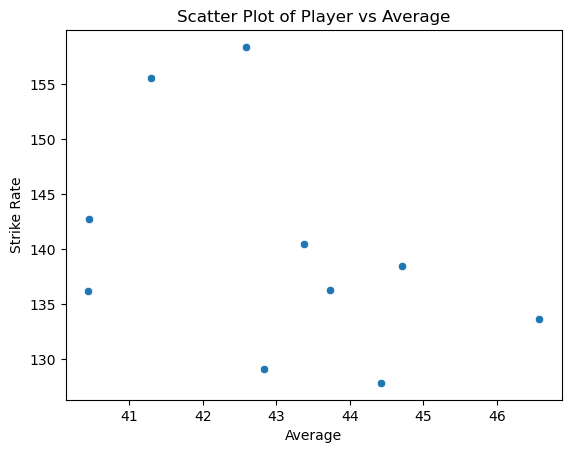

In [23]:
sns.scatterplot(merged_df[:10],x='average',y='strike rate')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Player vs Average')
plt.show()

# Best Bowlers

In [25]:
bowl_df=df.groupby(['p_bowl','bowl']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique','bowl_style':'max'}).reset_index()
bowl_df['economy']=bowl_df['bowlruns']*6/bowl_df['ballfaced']
bowl_df.head()

,p_bowl,bowl,bowlruns,ballfaced,p_match,bowl_style,economy
0,4068,Jim Allenby,385,277,23,RM,8.339350
1,4504,Ahillen Beadle,61,48,2,SLA,7.625000
2,4508,Doug Bollinger,570,403,20,LFM,8.486352
3,4818,Mark Cosgrove,19,12,1,RM,9.500000
4,4823,Steven Crook,774,494,35,RFM,9.400810


In [28]:
bowl_outs=df[df['out']==True].groupby(['p_bowl','bowl']).size().reset_index(name='outs')
merged_bowl=pd.merge(bowl_df,bowl_outs,on=['p_bowl','bowl'])
merged_bowl['average']=merged_bowl['bowlruns']/merged_bowl['outs']
merged_bowl['strike rate']=merged_bowl['ballfaced']/merged_bowl['outs']
merged_bowl=merged_bowl[(merged_bowl['p_match']>25) & (merged_bowl['ballfaced']>500)].sort_values(by='average', ascending=True)
merged_bowl.head(10)

,p_bowl,bowl,bowlruns,ballfaced,p_match,bowl_style,economy,outs,average,strike rate
933,535353,Ottniel Baartman,1066,935,44,RFM,6.840642,71,15.014085,13.169014
550,351588,Mark Wood,1231,936,41,RF,7.891026,79,15.582278,11.848101
935,535393,Senuran Muthusamy,785,749,46,SLA,6.288385,49,16.020408,15.285714
488,326968,Michael Bracewell,834,671,40,OB,7.457526,52,16.038462,12.903846
422,307808,Rohan Mustafa,901,757,41,OB,7.141347,56,16.089286,13.517857
1431,897549,Will Jacks,733,609,49,OB,7.221675,45,16.288889,13.533333
1341,784379,Wanindu Hasaranga de Silva,2547,2210,101,RWS,6.914932,156,16.326923,14.166667
1547,960361,Sandeep Lamichhane,2499,2198,98,RWS,6.821656,148,16.885135,14.851351
151,42699,Saeed Ajmal,1037,873,39,OB,7.127148,61,17.000000,14.311475
1365,800675,Karan KC,737,515,26,RF,8.586408,43,17.139535,11.976744


# Batter's performaces against every bowling type

In [30]:
total_runs=df.groupby(['p_bat','bat','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=total_runs['batruns']*100/total_runs['ballfaced']
total_runs.rename(columns={'p_match':'matches'},inplace=True)
total_runs.head()

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate
5207,296597,James Vince,RFM,194,2674,1871,142.918226
4283,249866,Alex Hales,RFM,216,2646,1730,152.947977
3865,232359,Colin Munro,RFM,205,2524,1664,151.682692
7213,348144,Babar Azam,RFM,167,2491,1813,137.396580
123,5334,Aaron Finch,RFM,174,2457,1617,151.948052


In [31]:
total_outs=df[df['out']==True].groupby(['p_bat','bat','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.rename(columns={'count':'dismissals'},inplace=True)
total_outs.head()

,p_bat,bat,bowl_style,dismissals
2882,249866,Alex Hales,RFM,90
3477,296597,James Vince,RFM,77
5578,403902,Liam Livingstone,RFM,75
2596,232359,Colin Munro,RFM,74
8086,571911,Joe Clarke,RFM,72


In [32]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat','bowl_style'])
merged_df.columns

Index(['p_bat', 'bat', 'bowl_style', 'matches', 'batruns', 'ballfaced',
       'strike rate', 'dismissals'],
      dtype='object')

In [35]:
merged_df['average']=merged_df['batruns']/merged_df['dismissals']
merged_df=merged_df[merged_df['ballfaced']>200].sort_values(by='average',ascending=False)
merged_df.shape

(1156, 9)

In [29]:
merged_df.to_excel('batters_against_bowlingtype.xlsx', index=False)

In [36]:
batters_against_rws=merged_df[merged_df['bowl_style']=='RWS'].sort_values(by='strike rate',ascending=False)
batters_against_rws.head(10)

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate,dismissals,average
179,51880,Chris Gayle,RWS,60,773,420,184.047619,16,48.312500
509,436757,Heinrich Klaasen,RWS,50,458,260,176.153846,13,35.230769
597,1137262,Azam Khan,RWS,47,414,241,171.784232,14,29.571429
656,662235,Josh Inglis,RWS,39,392,237,165.400844,12,32.666667
493,41028,Kamran Akmal,RWS,44,465,283,164.310954,16,29.062500
180,604302,Nicholas Pooran,RWS,83,773,492,157.113821,17,45.470588
406,297433,Jonny Bairstow,RWS,48,523,333,157.057057,17,30.764706
305,8917,Moeen Ali,RWS,78,615,392,156.887755,30,20.500000
572,46543,Wayne Madsen,RWS,45,425,272,156.250000,7,60.714286
547,55395,Colin de Grandhomme,RWS,67,441,283,155.830389,20,22.050000


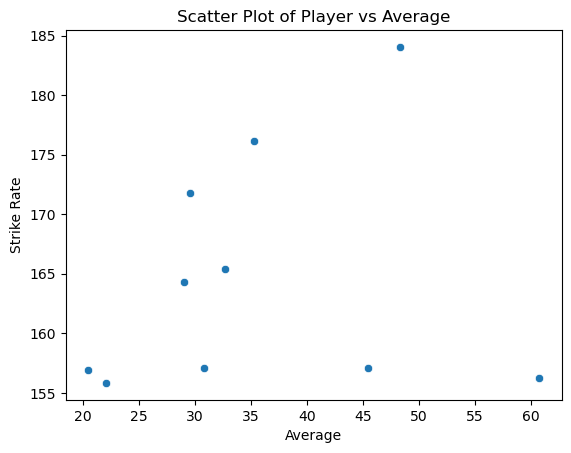

In [37]:
sns.scatterplot(data=batters_against_rws.iloc[:10],x='average',y='strike rate')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Player vs Average')
plt.show()

# Bowler's performance against right and left handed batters

In [39]:
bowl_df=df.groupby(['p_bowl','bowl','bat_hand']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique','bowl_style':'max'}).reset_index()
bowl_df['economy']=bowl_df['bowlruns']*6/bowl_df['ballfaced']
bowl_df.head()

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy
0,4068,Jim Allenby,LHB,106,82,13,RM,7.756098
1,4068,Jim Allenby,RHB,279,195,21,RM,8.584615
2,4504,Ahillen Beadle,RHB,61,48,2,SLA,7.625000
3,4508,Doug Bollinger,LHB,180,130,18,LFM,8.307692
4,4508,Doug Bollinger,RHB,390,273,20,LFM,8.571429


In [40]:
bowl_outs=df[df['out']==True].groupby(['p_bowl','bowl','bat_hand']).size().reset_index(name='outs')
bowl_outs.head()

,p_bowl,bowl,bat_hand,outs
0,4068,Jim Allenby,LHB,1
1,4068,Jim Allenby,RHB,7
2,4504,Ahillen Beadle,RHB,1
3,4508,Doug Bollinger,LHB,6
4,4508,Doug Bollinger,RHB,13


In [41]:
merged_bowl=pd.merge(bowl_df,bowl_outs,on=['p_bowl','bowl','bat_hand'])
merged_bowl['average']=merged_bowl['bowlruns']/merged_bowl['outs']
merged_bowl['strike rate']=merged_bowl['ballfaced']/merged_bowl['outs']
merged_bowl=merged_bowl[(merged_bowl['p_match']>25) & (merged_bowl['ballfaced']>500)].sort_values(by='average', ascending=True)
merged_bowl.head(10)

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy,outs,average,strike rate
2456,784379,Wanindu Hasaranga de Silva,RHB,1748,1588,101,RWS,6.604534,122,14.327869,13.016393
1329,432960,Simon Harmer,LHB,816,705,94,OB,6.944681,56,14.571429,12.589286
1720,535353,Ottniel Baartman,RHB,791,703,44,RFM,6.751067,54,14.648148,13.018519
773,307808,Rohan Mustafa,RHB,689,570,40,OB,7.252632,47,14.659574,12.127660
1724,535393,Senuran Muthusamy,RHB,597,579,45,SLA,6.186528,40,14.925000,14.475000
1180,390481,Harshal Patel,RHB,1761,1294,100,RM,8.165379,108,16.305556,11.981481
2815,960361,Sandeep Lamichhane,RHB,1803,1593,96,RWS,6.790960,109,16.541284,14.614679
276,42699,Saeed Ajmal,RHB,703,595,38,OB,7.089076,42,16.738095,14.166667
1017,351588,Mark Wood,RHB,913,687,40,RF,7.973799,54,16.907407,12.722222
415,52912,Ravi Rampaul,LHB,783,556,73,RFM,8.449640,46,17.021739,12.086957


In [35]:
merged_bowl.to_excel('Bowling Performaces against left and right handers.xlsx',index=False)

In [54]:
match_details=df[(df['inns']==1) & (df['winner']!='-')].groupby('p_match').agg({'team_bat':'first','team_bowl':'first','winner':'max','ground':'max','date':'max','toss':'max'}).reset_index()
match_details.head()

,p_match,team_bat,team_bowl,winner,ground,date,toss
0,722335,South Africa,West Indies,West Indies,"Newlands, Cape Town",2015-01-09,South Africa
1,722337,South Africa,West Indies,West Indies,"New Wanderers Stadium, Johannesburg",2015-01-11,West Indies
2,736063,South Africa,West Indies,South Africa,"Kingsmead, Durban",2015-01-14,West Indies
3,743953,England,New Zealand,England,"Old Trafford, Manchester",2015-06-23,England
4,743975,England,Australia,England,"Sophia Gardens, Cardiff",2015-08-31,Australia


In [87]:
teams=pd.concat([match_details['team_bat'],match_details['team_bowl']]).drop_duplicates()
teams.head()

0       South Africa
3            England
5     Sydney Thunder
6      Brisbane Heat
7    Melbourne Stars
dtype: object

In [89]:
team_winnnings_df=pd.DataFrame(columns=['team','wins'])
for team in teams:
    team_winnnings_df['team']=team
    team_winnnings_df['wins']=match_details[match_details['winner']==team].shape[0]
team_winnnings_df.head()

,team,wins
